<a href="https://colab.research.google.com/github/kghilothia06/customer_analysis/blob/master/model_building_LSTM_CAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing python libraries

In [1]:
import numpy as np #for numerical computations
import pandas as pd #for reading the dataset
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for interactive visualizations

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Importing the dataset
df = pd.read_excel('/content/drive/My Drive/Customers2_TimeSeries.xlsx')

# Exploring the dataset

In [3]:
df.info

<bound method DataFrame.info of       CustomerID       Date         Interaction MadeAPurchase
0              1 2020-01-05           call_made            No
1              1 2020-01-06       call_received            No
2              1 2020-01-07          email_sent            No
3              1 2020-01-08        email_opened            No
4              1 2020-01-09        email_opened            No
...          ...        ...                 ...           ...
6019         753 2020-01-31       call_received           Yes
6020         753 2020-02-01          email_sent           Yes
6021         753 2020-02-02        email_opened           Yes
6022         753 2020-02-03        email_opened           Yes
6023         753 2020-02-04  webinar_registered           Yes

[6024 rows x 4 columns]>

In [142]:
#first 5 entries
df.head(10)

,CustomerID,Date,Interaction,MadeAPurchase
0,1,2020-01-05,call_made,No
1,1,2020-01-06,call_received,No
2,1,2020-01-07,email_sent,No
3,1,2020-01-08,email_opened,No
4,1,2020-01-09,email_opened,No
5,1,2020-01-10,webinar_registered,No
6,1,2020-01-11,webinar_attended,No
7,1,2020-01-12,paper_downloaded,No
8,2,2020-01-13,call_received,No
9,2,2020-01-14,call_received,No


In [143]:
df.shape

(6024, 4)

In [144]:
df.describe

<bound method NDFrame.describe of       CustomerID       Date         Interaction MadeAPurchase
0              1 2020-01-05           call_made            No
1              1 2020-01-06       call_received            No
2              1 2020-01-07          email_sent            No
3              1 2020-01-08        email_opened            No
4              1 2020-01-09        email_opened            No
...          ...        ...                 ...           ...
6019         753 2020-01-31       call_received           Yes
6020         753 2020-02-01          email_sent           Yes
6021         753 2020-02-02        email_opened           Yes
6022         753 2020-02-03        email_opened           Yes
6023         753 2020-02-04  webinar_registered           Yes

[6024 rows x 4 columns]>

In [145]:
#checking for missing/null values
df.isnull().sum()

CustomerID       0
Date             0
Interaction      0
MadeAPurchase    0
dtype: int64

In [146]:
#counting no. of different interactions possible from the dataset
df.Interaction.value_counts()

email_opened          1447
call_received         1348
call_made              776
email_sent             661
paper_downloaded       658
webinar_registered     587
webinar_attended       547
Name: Interaction, dtype: int64

In [147]:
#counting no. of different dates in the dataset
df['Date'].value_counts()

2020-02-19    198
2020-02-15    198
2020-02-21    198
2020-02-20    198
2020-02-18    198
             ... 
2020-02-11     52
2020-02-09     52
2020-02-10     52
2020-02-12     52
2020-02-14     52
Name: Date, Length: 65, dtype: int64

# Data Preprocessing & Visualization

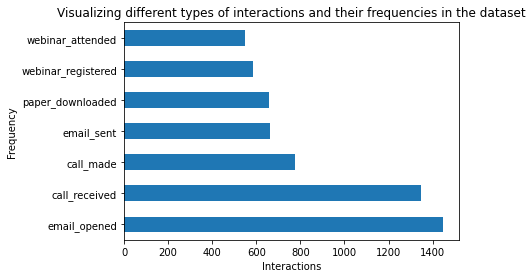

In [148]:
#plotting a bar graph of 'Interaction' column
df['Interaction'].value_counts().plot(kind='barh')
plt.xlabel('Interactions')
plt.ylabel('Frequency')
plt.title('Visualizing different types of interactions and their frequencies in the dataset')
plt.show()

In [0]:
#We label encode 'MadeAPurchase' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['MadeAPurchase'] = le.fit_transform(df['MadeAPurchase'])


In [0]:
#We now label encode 'Interaction' column
df['Interaction'] = le.fit_transform(df['Interaction'])

Now, we partition the data as follows:
We follow sliding window technique with each window denoting activities of one customer over a period of 8 days

In [0]:
# segments is a list where each row contains activities of a single customer
# labels is a list containing whether a purchase is made or not for each customer
N_time_steps = 8
step = 8
segments = []
labels = []
for i in range(0,len(df)-1,step):
  xs = df['Interaction'].values[i : i+N_time_steps]
  ys = df['MadeAPurchase'].values[i]
  segments.append([xs])
  labels.append([ys])

In [8]:
labels = np.array(labels)
labels.shape

(753, 1)

In [9]:
reshaped_segments = np.array(segments).reshape(753,8,1)
reshaped_segments

array([[[0],
        [1],
        [3],
        ...,
        [6],
        [5],
        [4]],

       [[1],
        [1],
        [3],
        ...,
        [6],
        [5],
        [4]],

       [[1],
        [1],
        [3],
        ...,
        [6],
        [5],
        [4]],

       ...,

       [[2],
        [0],
        [5],
        ...,
        [2],
        [2],
        [6]],

       [[5],
        [4],
        [1],
        ...,
        [2],
        [2],
        [6]],

       [[5],
        [4],
        [1],
        ...,
        [2],
        [2],
        [6]]])

##Model Building

train-test split

out of 753 customers , we keep data of around 600 customers as training data and rest as test data


Lets start building the LSTM network first

In [10]:
import tensorflow.keras
from keras.layers import *
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(LSTM(64,input_shape=(8,1) , return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(32 , return_sequences=True ))
model.add(Dropout(0.25))
model.add(LSTM(32))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error' , optimizer='adam' , metrics=['accuracy'] )

In [45]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 8, 64)             16896     
_________________________________________________________________
dropout_15 (Dropout)         (None, 8, 64)             0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 8, 32)             12416     
_________________________________________________________________
dropout_16 (Dropout)         (None, 8, 32)             0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dropout_17 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)               

In [46]:
epochs_hist = model.fit(reshaped_segments , labels  , batch_size=128 , epochs=10 , validation_split=0.2)


Train on 602 samples, validate on 151 samples
Epoch 1/10
602/602 [==============================] - 1s 2ms/step - loss: 0.2405 - accuracy: 0.6545 - val_loss: 0.2255 - val_accuracy: 0.6887
Epoch 2/10
602/602 [==============================] - 0s 241us/step - loss: 0.2261 - accuracy: 0.6728 - val_loss: 0.2172 - val_accuracy: 0.6887
Epoch 3/10
602/602 [==============================] - 0s 237us/step - loss: 0.2230 - accuracy: 0.6728 - val_loss: 0.2169 - val_accuracy: 0.6887
Epoch 4/10
602/602 [==============================] - 0s 233us/step - loss: 0.2245 - accuracy: 0.6728 - val_loss: 0.2165 - val_accuracy: 0.6887
Epoch 5/10
602/602 [==============================] - 0s 234us/step - loss: 0.2218 - accuracy: 0.6728 - val_loss: 0.2166 - val_accuracy: 0.6887
Epoch 6/10
602/602 [==============================] - 0s 230us/step - loss: 0.2224 - accuracy: 0.6728 - val_loss: 0.2173 - val_accuracy: 0.6887
Epoch 7/10
602/602 [==============================] - 0s 265us/step - loss: 0.2224 - accurac

##Model Evaluation

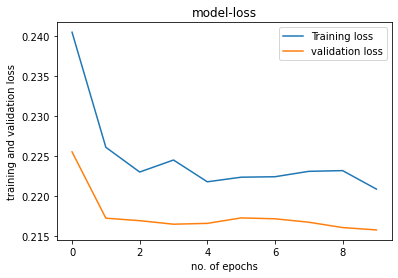

In [48]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('model-loss')
plt.ylabel('training and validation loss')
plt.xlabel('no. of epochs')
plt.legend(['Training loss' , 'validation loss'])
plt.show()